## Problem 1: Univariate Linear Regression
### Expected restaurant profit as a function of city population

This problem is taken from week 2 of the Coursera Machine Learning course by Andrew Ng. The in-class solution was performed in Octave. This workbook is an alternative method of solving in Python.

The scenario is as follows: 
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.


### Approach
First we will build out a linear regression solution using the linear algebra fundamentals. Then we will use the other pre-made linear regression models in scipy as an alternative.

## Part 1 - Manually create univariate linear regression analysis using vectorized operations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

### Load the data using a pandas DataFrame. First column is feature and second is the target

In [2]:
path_to_data = './ex1/ex1data1.txt'
data = pd.read_csv(path_to_data,names=['Population','Expected Profit'])
data['Intercept'] = np.zeros(len(data['Population']))+1 # Add a column for bias, or intercept, feature
data.describe()

,Population,Expected Profit,Intercept
count,97.000000,97.000000,97.0
mean,8.159800,5.839135,1.0
std,3.869884,5.510262,0.0
min,5.026900,-2.680700,1.0
25%,5.707700,1.986900,1.0
50%,6.589400,4.562300,1.0
75%,8.578100,7.046700,1.0
max,22.203000,24.147000,1.0


### Define the attributes and targets objects from data set, initialize the attribute vector, $\theta$

Text(0,0.5,'Profit in $10,000s')

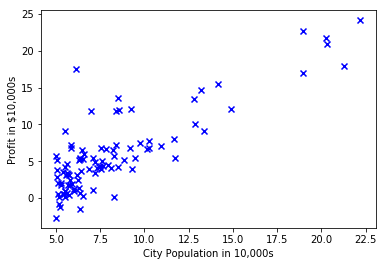

In [3]:
X = data[['Intercept','Population']].values # attributes vector
y = data['Expected Profit'].values # expected profit
theta  = np.zeros((2,1)) # parameter vector

# Visulaize the data with a scatter plot
fig,ax = plt.subplots()
ax.scatter(X[:,1],y[:],color='b',marker='x')
ax.set_xlabel('City Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')

### Define a function to evaluate the cost function and a function for traditional gradient descent

In [4]:
def evaluate_cost_func(X, y, theta):
    # number of training data points
    m = float(len(y))
    J = 1.0/(2*m)*np.sum((np.matmul(np.transpose(theta),np.transpose(X)) - np.transpose(y))**2) # linear alegabra evlaulation of cost function
    return J

In [5]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = float(len(y))
    J_history = []
    for iteration in range(num_iters):
        theta = theta - (float(alpha)/m)*np.transpose(np.matmul(np.matmul(np.transpose(theta),np.transpose(X)) - np.transpose(y),X))
        J_history.append(evaluate_cost_func(X, y, theta))
    return theta,J_history

### Run univarient linear regression using gradient decent and plot the cost function as a function of iteration number

In [6]:
num_iter = 1000 # number of iterations in gradient decen
alpha = 0.02 # learning rate
theta  = np.zeros((2,1)) # parameter vector

theta, J_history = gradient_descent(X, y, theta, 0.02, num_iter)
print(f"Post-decent parameter values: bias = {theta[0][0]}, slope = {theta[1][0]}") 

Post-decent parameter values: bias = -3.788419261551182, slope = 1.1822480052540147


Text(0.5,0,'Iteration Number [#]')

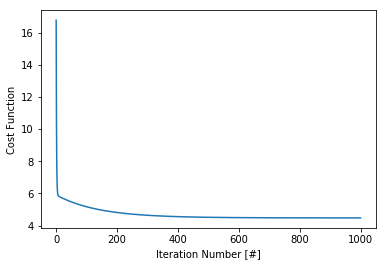

In [13]:
# Plot the cost function, J, over iteration count
fig,ax = plt.subplots()
ax.plot(range(num_iter),J_history)
ax.set_ylabel('Cost Function')
ax.set_xlabel('Iteration Number [#]')

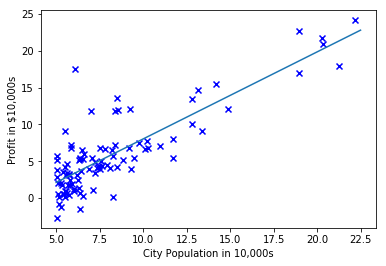

In [8]:
# Plot the linear regression result with the data
fig,ax = plt.subplots()
ax.scatter(X[:,1],y[:],color='b',marker='x')
ax.set_xlabel('City Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')

fit_x = np.linspace(5,22.5,100)
fit_y = theta[0][0] + theta[1][0]*fit_x

ax.plot(fit_x,fit_y)

## Result

The linear regression result looks to fit the data fairly well. We now have a relationship which can be used to determine expected profits as a function of city population. This can be used as one of the pieces of information to help inform a decision as to whether or not a new franchise in a given city should be pursued.

# Part 2: Solving with linear regression model from scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression

X_2 = X[:,1:] # we don't need the first column of all ones for this method.

# with the data already prepared, we can simply initalize a linear regression object and call fit
reg = LinearRegression().fit(X_2, y)

print(f"Scikit-learn Result: intercept = {reg.intercept_}, slope = {reg.coef_[0]}")

Scikit-learn Result: intercept = -3.8957808783118537, slope = 1.193033644189594


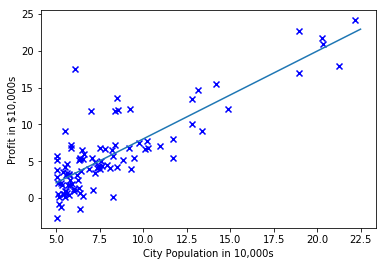

In [10]:
# Plot the linear regression result with the data
fig,ax = plt.subplots()
ax.scatter(X[:,1],y[:],color='b',marker='x')
ax.set_xlabel('City Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')

fit_x = np.linspace(5,22.5,100)
fit_y = reg.intercept_ + reg.coef_[0]*fit_x

ax.plot(fit_x,fit_y)

## Result

There is a very small difference between the methods. This provides confidence that our manual linear regression method is working well. 
